In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv(r"C:\Users\Soft\Desktop\Py\Docs\monthly_milk_production.csv", index_col="Date", parse_dates=True)

In [7]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [8]:
df.describe()

,Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


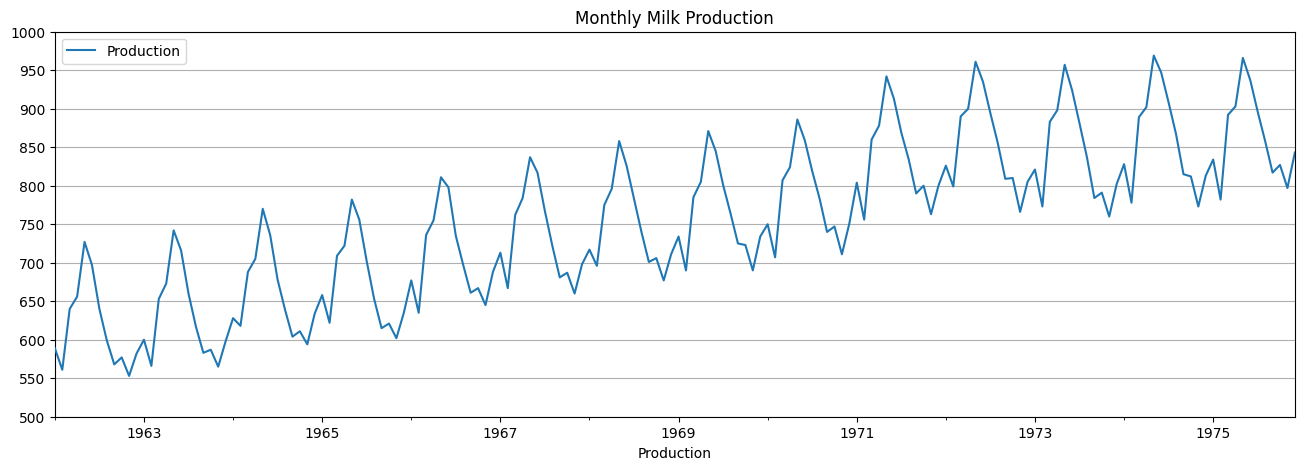

In [19]:
df.plot(figsize=(16, 5), title="Monthly Milk Production", xlabel="Production",
       zorder=3, yticks=range(500, 1001, 50))
plt.grid(axis="y", zorder=0)
plt.show()

In [25]:
for i in range(1962, 1976):
    print(df.loc[f"{i}"].mean()[0])

615.75
630.0
658.75
673.0833333333334
708.75
732.9166666666666
748.8333333333334
763.9166666666666
782.0
834.0833333333334
854.1666666666666
842.5833333333334
858.4166666666666
862.6666666666666


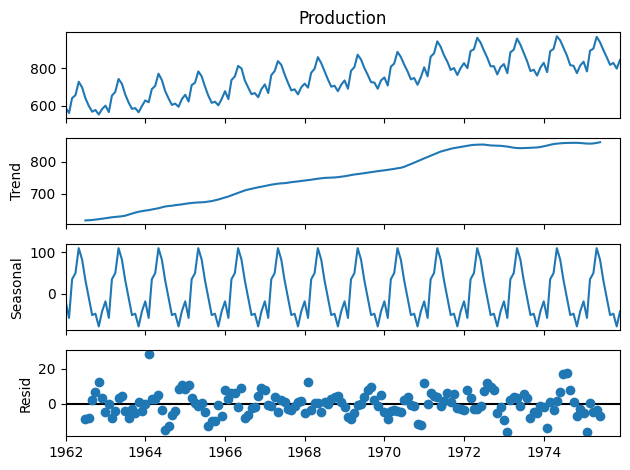

In [34]:
sd = seasonal_decompose(df["Production"])
sd.plot();

In [36]:
df.isna().sum()

Production    0
dtype: int64

In [37]:
train = df[:len(df)-12]

In [38]:
train

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1974-08-01,867
1974-09-01,815
1974-10-01,812


In [39]:
test = df[len(df)-12:]

In [40]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [41]:
minmax = MinMaxScaler()

In [42]:
minmax.fit(train)

MinMaxScaler()

In [43]:
scaled_train = minmax.transform(train)
scaled_test = minmax.transform(test)

In [45]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=12, batch_size=1)

In [47]:
generator[0]

(array([[[0.08653846],
         [0.01923077],
         [0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154]]]),
 array([[0.11298077]]))

In [48]:
generator[1]

(array([[[0.01923077],
         [0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154],
         [0.11298077]]]),
 array([[0.03125]]))

In [49]:
generator[2]

(array([[[0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154],
         [0.11298077],
         [0.03125   ]]]),
 array([[0.24038462]]))

In [50]:
len(generator)

144

In [55]:
generator[0][0].shape

(1, 12, 1)

In [57]:
model = Sequential([
    LSTM(2000, activation="relu", input_shape=((12, 1))),
    Dense(1)
])

In [59]:
model.compile(optimizer="adam", loss=["mse"])

In [61]:
history = model.fit(generator, epochs=20)

Epoch 1/20
144/144 [==============================] - 61s 422ms/step - loss: 0.0296
Epoch 2/20
144/144 [==============================] - 60s 416ms/step - loss: 0.0088
Epoch 3/20
144/144 [==============================] - 59s 410ms/step - loss: 0.0046
Epoch 4/20
144/144 [==============================] - 60s 413ms/step - loss: 0.0043
Epoch 5/20
144/144 [==============================] - 60s 414ms/step - loss: 0.0034
Epoch 6/20
144/144 [==============================] - 60s 415ms/step - loss: 0.0058
Epoch 7/20
144/144 [==============================] - 60s 416ms/step - loss: 0.0049
Epoch 8/20
144/144 [==============================] - 60s 419ms/step - loss: 0.0019
Epoch 9/20
144/144 [==============================] - 60s 418ms/step - loss: 0.0026
Epoch 10/20
144/144 [==============================] - 61s 423ms/step - loss: 0.0027
Epoch 11/20
144/144 [==============================] - 62s 429ms/step - loss: 0.0035
Epoch 12/20
144/144 [==============================] - 58s 406ms/step - lo

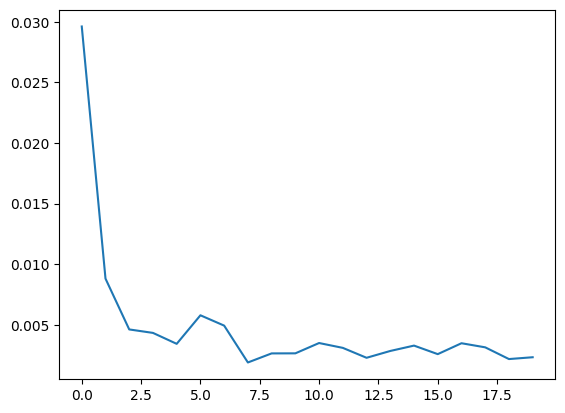

In [62]:
plt.plot(history.history["loss"])
plt.show()

In [64]:
last_trained_batch = scaled_train[-12:]
last_trained_batch = last_trained_batch.reshape((1, 12, 1))
last_trained_batch

array([[[0.66105769],
        [0.54086538],
        [0.80769231],
        [0.83894231],
        [1.        ],
        [0.94711538],
        [0.85336538],
        [0.75480769],
        [0.62980769],
        [0.62259615],
        [0.52884615],
        [0.625     ]]])

In [66]:
model.predict(last_trained_batch)[0]

1/1 [==============================] - 0s 96ms/step


array([0.68781143], dtype=float32)

In [67]:
scaled_test[0]

array([0.67548077])

In [68]:
test_pred = []

In [69]:
first_eval_batch = scaled_train[-12:]
current_batch = first_eval_batch.reshape((1, 12, 1))

In [70]:
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_pred.append(current_pred)

    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 [==============================] - 0s 86ms/step


In [71]:
test_pred

[array([0.68781143], dtype=float32),
 array([0.5972706], dtype=float32),
 array([0.8136987], dtype=float32),
 array([0.85539776], dtype=float32),
 array([0.99225986], dtype=float32),
 array([0.953628], dtype=float32),
 array([0.8703111], dtype=float32),
 array([0.78589666], dtype=float32),
 array([0.676879], dtype=float32),
 array([0.66013646], dtype=float32),
 array([0.5808024], dtype=float32),
 array([0.65683436], dtype=float32)]

In [72]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [73]:
act_pred = minmax.inverse_transform(test_pred)
act_pred

array([[839.12955666],
       [801.46457291],
       [891.49866295],
       [908.84546852],
       [965.78010178],
       [949.7092495 ],
       [915.04940987],
       [879.9330101 ],
       [834.58165932],
       [827.61676788],
       [794.61379051],
       [826.2430954 ]])

In [74]:
test["Prediction"] = act_pred

In [75]:
test

,Production,Prediction
Date,,
1975-01-01,834,839.129557
1975-02-01,782,801.464573
1975-03-01,892,891.498663
1975-04-01,903,908.845469
1975-05-01,966,965.780102
1975-06-01,937,949.709249
1975-07-01,896,915.049410
1975-08-01,858,879.933010
1975-09-01,817,834.581659


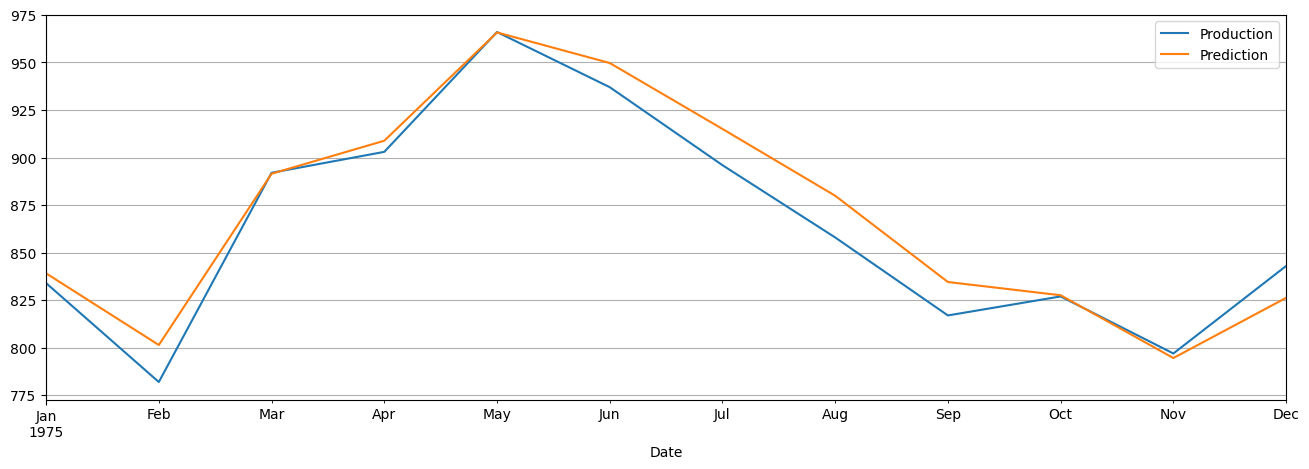

In [78]:
test.plot(figsize=(16, 5), grid=True)
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
rmse = np.sqrt(mean_squared_error(test["Production"], test["Prediction"]))

In [81]:
rmse

13.04190717093942

In [82]:
test.mean()

Production    862.666667
Prediction    869.538779
dtype: float64

In [84]:
r2 = r2_score(test["Production"], test["Prediction"])

In [85]:
r2

0.9420285882680928